In [1]:
import sys, os, io
import dvc.api
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.preprocess import Preprocess
from scripts.dataloader import DataLoader

In [3]:
train_data = '../data/clean/train.csv'
test_data = '../data/clean/test.csv'
store_data = '../data/clean/store.csv'

In [4]:
dataloader = DataLoader()
repo = 'https://github.com/Haylemicheal/Pharmaceutical-Sales-Prediction/'
content_train =dvc.api.read(path=train_data, repo=repo, rev='cleaned-v')
df_train = dataloader.read_csv(io.StringIO(content_train))
content_store =dvc.api.read(path=store_data, repo=repo, rev='cleaned-v')
df_store = dataloader.read_csv(io.StringIO(content_store))
content_test =dvc.api.read(path=test_data, repo=repo, rev='cleaned-v')
df_test = dataloader.read_csv(io.StringIO(content_test))

In [5]:
df_train.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263,555,1,1,0,1
1,1,2,5,2015-07-31,6064,625,1,1,0,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1
4,4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
import pandas as pd
df_store.columns

Index(['Unnamed: 0', 'Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
merged_train = result = pd.merge(df_train,
                 df_store,
                 on='Store')

In [8]:
merged_train.head()

,Unnamed: 0_x,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0_y,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,1115,1,4,2015-07-30,5020,546,1,1,0,1,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
2,2230,1,3,2015-07-29,4782,523,1,1,0,1,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
3,3345,1,2,2015-07-28,5011,560,1,1,0,1,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,4460,1,1,2015-07-27,6102,612,1,1,0,1,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [9]:
#Check for missing data
from scripts.exploration import Exploration
exp = Exploration()
percent_missing, missing_count = exp.get_missing(merged_train)

In [10]:
missing_count

Unnamed: 0_x                 0
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Unnamed: 0_y                 0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [11]:
merged_train.to_csv('../data/clean/merged_data.csv')

In [12]:
dataloader = DataLoader()
repo = 'https://github.com/Haylemicheal/Pharmaceutical-Sales-Prediction/'
content_train =dvc.api.read(path='../data/clean/merged_data.csv', repo=repo, rev='train-v')
df_merged_train = dataloader.read_csv(io.StringIO(content_train))

In [13]:
df_merged_train.head()

,Unnamed: 0,Unnamed: 0_x,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,...,Unnamed: 0_y,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,0,1,5,2015-07-31,5263,555,1,1,0,...,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,1,1115,1,4,2015-07-30,5020,546,1,1,0,...,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
2,2,2230,1,3,2015-07-29,4782,523,1,1,0,...,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
3,3,3345,1,2,2015-07-28,5011,560,1,1,0,...,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,4,4460,1,1,2015-07-27,6102,612,1,1,0,...,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


### Get some more date features

In [14]:
from scripts.feature_eng import FeatureEngineering
feature_eng = FeatureEngineering(df_merged_train)

In [15]:
feature_eng.preprocess()
train_df = feature_eng.df
train_df.head()

,Unnamed: 0,Unnamed: 0_x,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,...,Promo2SinceYear,PromoInterval,weekday,weekend,month,year,day,period_in_month,before_holiday,after_holiday
0,0,0,1,5,2015-07-31,5263,555,1,1,0,...,2012.0,"Jan,Apr,Jul,Oct",1,0,7,2015,31,2,57,0
1,1,1115,1,4,2015-07-30,5020,546,1,1,0,...,2012.0,"Jan,Apr,Jul,Oct",1,0,7,2015,30,2,56,0
2,2,2230,1,3,2015-07-29,4782,523,1,1,0,...,2012.0,"Jan,Apr,Jul,Oct",1,0,7,2015,29,2,55,0
3,3,3345,1,2,2015-07-28,5011,560,1,1,0,...,2012.0,"Jan,Apr,Jul,Oct",1,0,7,2015,28,2,54,0
4,4,4460,1,1,2015-07-27,6102,612,1,1,0,...,2012.0,"Jan,Apr,Jul,Oct",1,0,7,2015,27,2,53,0


### Train the model

In [16]:
from sklearn.ensemble import RandomForestRegressor
from scripts.modeling import Model
random_forest_args = {
    'n_estimators': 100,
    'max_depth': 16,
    'max_features': 'sqrt',
    'n_jobs': 4
}
modeling = Model(train_df, RandomForestRegressor)
model, result = modeling.train(random_forest_args, 'random_forest_regressor')

/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'RandomForestModel' already exists. Creating a new version of this model...
2022/09/10 09:32:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: RandomForestModel, version 4
Created version '4' of model 'RandomForestModel'.


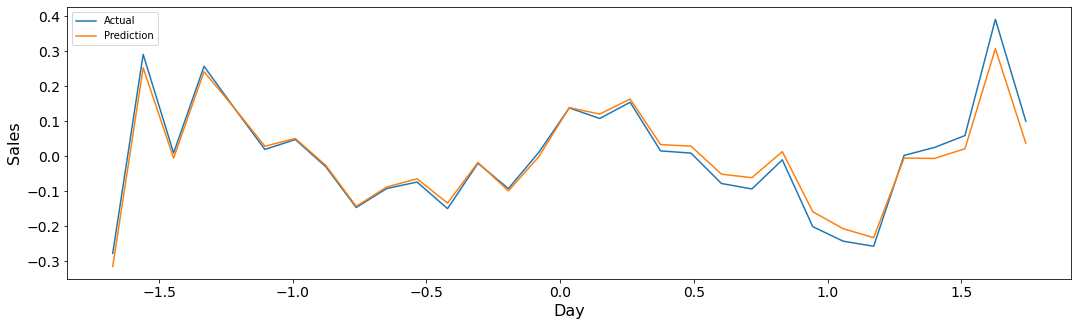

In [20]:
modeling.prediction_graph(result)

In [21]:
from scripts.utils import Util

In [23]:
util = Util()
util.save_model(model)